In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [20]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [7]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

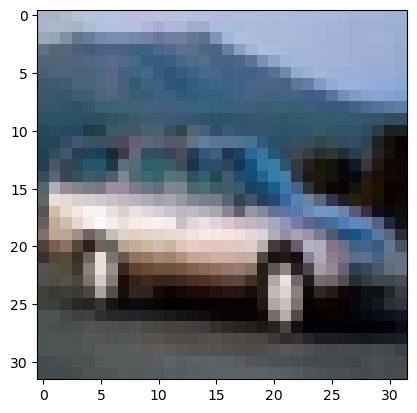

In [9]:
plt.imshow(x_train[4])

In [10]:
labels[y_train[4]]

'automobile'

In [11]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x_train[index])
    plt.xlabel(labels[y_train[index]])

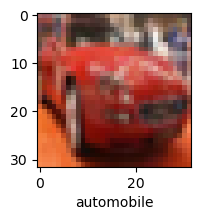

In [12]:
plot_sample(x_train, y_train, 5)

In [13]:
x_train = x_train/255
x_test = x_test/255 

In [15]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [17]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10


1563/1563 [==============================] - 91s 57ms/step - loss: 1.4421 - accuracy: 0.4781
Epoch 2/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.0886 - accuracy: 0.6190
Epoch 3/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.8746 - accuracy: 0.6946
Epoch 4/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.6832 - accuracy: 0.7597
Epoch 5/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.4978 - accuracy: 0.8241
Epoch 6/10
1563/1563 [==============================] - 90s 57ms/step - loss: 0.3278 - accuracy: 0.8836
Epoch 7/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.2218 - accuracy: 0.9228
Epoch 8/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.1681 - accuracy: 0.9426
Epoch 9/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.1373 - accuracy: 0.9541
Epoch 10/10
1563/1563 [==============================] - 90s 5

In [19]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.0024 - accuracy: 0.6592


[2.0024211406707764, 0.6592000126838684]

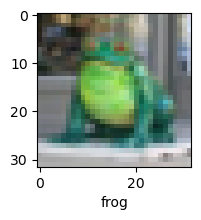

In [30]:
plot_sample(x_test, y_test, 19)

In [22]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [31]:
labels[np.argmax(y_pred[19])]

'frog'